<center>

# **Introduction to Machine Learning Project CLC-24-2**

<center>

## **Student Information**

<center>

| **Student Name** | **Student ID** |
| --- | --- |
| Đặng Thanh Tú | 22127432 |
| Nguyễn Công Tuấn | 22127436 |

</center>

## **Import modules/packages**

$pip install numpy pandas matplotlib seaborn

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

## **Exploratory Data Analysis (EDA)**

This step concerns the analysis of obtained data to *understand its characteristics* and to *identify potential issues that may affect modeling*. There are several tasks related to this step, including but not limit to:

### **Data Collection**

Gather data either to have a preliminary dataset for the first time or to supplement the data from previous phases(s).

In [52]:
# We will handle later

### **Data Preprocessing**

Clean the data by *handling missing values*, *normalizing* or *standardizing features* and *encoding categorical variables* as needed.

#### **Read the dataset**

In [53]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [54]:
train.head()

,id,Age,Gender,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,target
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1200000 non-null  int64  
 1   Age         1181295 non-null  float64
 2   Gender      1200000 non-null  object 
 3   feature_0   1155051 non-null  float64
 4   feature_1   1181471 non-null  object 
 5   feature_2   1090328 non-null  float64
 6   feature_3   1200000 non-null  object 
 7   feature_4   841925 non-null   object 
 8   feature_5   1125924 non-null  float64
 9   feature_6   1200000 non-null  object 
 10  feature_7   1200000 non-null  object 
 11  feature_8   835971 non-null   float64
 12  feature_9   1199994 non-null  float64
 13  feature_10  1062118 non-null  float64
 14  feature_11  1199999 non-null  float64
 15  feature_12  1200000 non-null  object 
 16  feature_13  1122176 non-null  object 
 17  feature_14  1200000 non-null  object 
 18  feature_15  1200000 no

#### **Exploratory the dataset**

**Number of numerical features**

In [56]:
# Numerical features
num_features = train.select_dtypes(include=['int64', 'float64']).columns.drop(['id', 'target'])

print(f'Number of numerical features: {len(num_features)}')
print(num_features)

Number of numerical features: 8
Index(['Age', 'feature_0', 'feature_2', 'feature_5', 'feature_8', 'feature_9',
       'feature_10', 'feature_11'],
      dtype='object')


**Number of categorical features**

In [57]:
# Categorical features
cat_features = train.select_dtypes(include=['object']).columns

print(f'Number of categorical features: {len(cat_features)}')
print(cat_features)

Number of categorical features: 11
Index(['Gender', 'feature_1', 'feature_3', 'feature_4', 'feature_6',
       'feature_7', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16'],
      dtype='object')


**Features containing the missing values**

In [58]:
missing_values = train.isnull().sum()
missing_features = missing_values[missing_values > 0]
missing_dtypes = train.dtypes[missing_features.index]

missing_summary = pd.DataFrame({"Missing Count": missing_features, "Data Type": missing_dtypes})

print(f"Features with Missing Values (total {len(missing_features)} features):")
print(missing_summary)

Features with Missing Values (total 11 features):
            Missing Count Data Type
Age                 18705   float64
feature_0           44949   float64
feature_1           18529    object
feature_2          109672   float64
feature_4          358075    object
feature_5           74076   float64
feature_8          364029   float64
feature_9               6   float64
feature_10         137882   float64
feature_11              1   float64
feature_13          77824    object


**Correlation of numerical features (use Pearson's Correlation)**

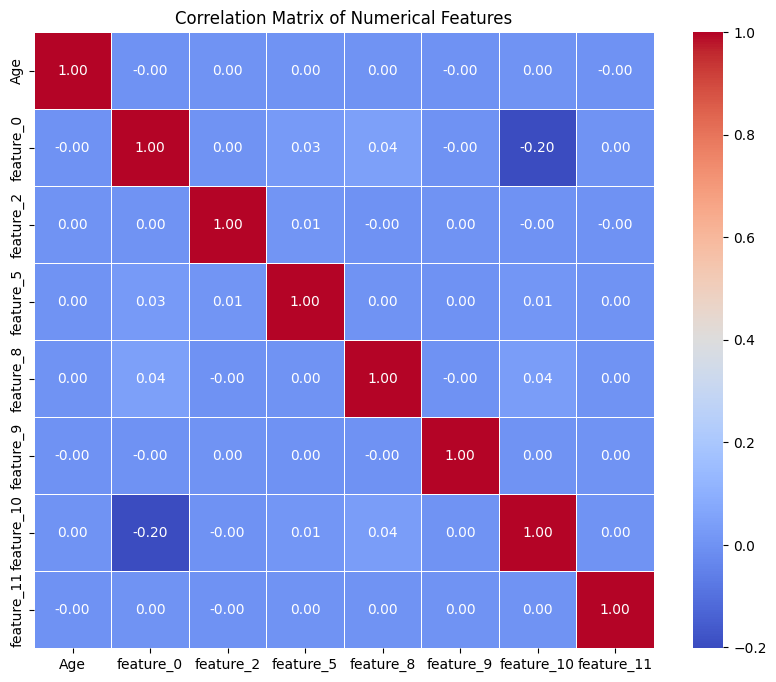

In [ ]:
corr_matrix = train[num_features, cat_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

$\Rightarrow$ Most correlation values are close to **0** indicating weak or no linear relationship between numerical features.

$\Rightarrow$ Use a model such as KNN or regression to predict missing values based on other features is impossible :>

**Handle missing values of feature_0**

In [60]:
train['feature_0']

0           10049.0
1           31678.0
2           25602.0
3          141855.0
4           39651.0
             ...   
1199995     27316.0
1199996     35786.0
1199997     51884.0
1199998         NaN
1199999         NaN
Name: feature_0, Length: 1200000, dtype: float64

Skewness: 1.470357488204046


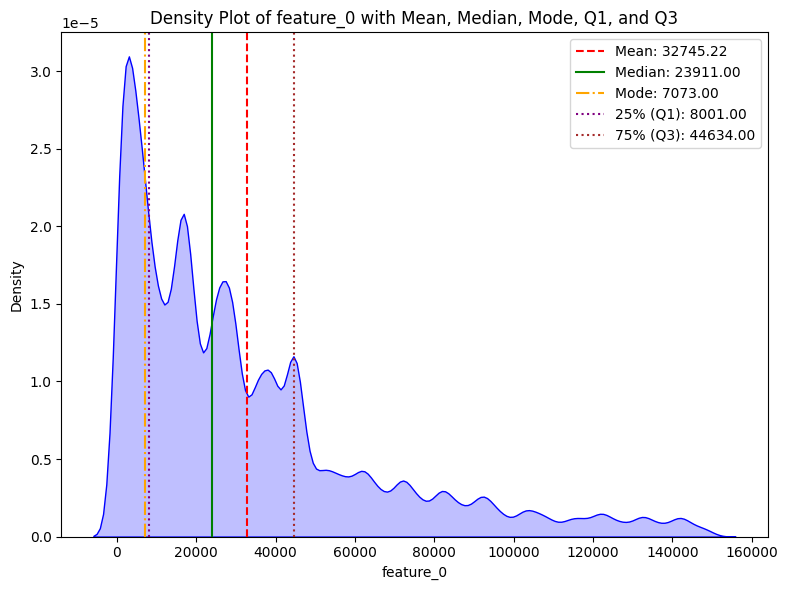

In [61]:
print("Skewness:", train['feature_0'].skew())

mean_val = train['feature_0'].mean()
median_val = train['feature_0'].median()
mode_val = train['feature_0'].mode()[0]
q1_val = train['feature_0'].quantile(0.25) 
q3_val = train['feature_0'].quantile(0.75) 

plt.figure(figsize=(8, 6))
sns.kdeplot(train['feature_0'], color="blue", fill=True)

plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle='-', label=f"Median: {median_val:.2f}")
plt.axvline(mode_val, color='orange', linestyle='-.', label=f"Mode: {mode_val:.2f}")
plt.axvline(q1_val, color='purple', linestyle=':', label=f"25% (Q1): {q1_val:.2f}")
plt.axvline(q3_val, color='brown', linestyle=':', label=f"75% (Q3): {q3_val:.2f}")

plt.title("Density Plot of feature_0 with Mean, Median, Mode, Q1, and Q3")
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
upper_limit = train['feature_0'].quantile(0.99)
train['feature_0'] = train['feature_0'].clip(upper=upper_limit)
train['feature_0'].fillna(train['feature_0'].median(), inplace=True)


train['feature_0_imputed'] = train['feature_0'].isnull().astype(int)


print("Missing values:", train['feature_0'].isnull().sum())

Missing values: 0


C:\Users\nguye\AppData\Local\Temp\ipykernel_17404\656941240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['feature_0'].fillna(train['feature_0'].median(), inplace=True)


In [63]:
# mean_val = train['feature_0'].mean()
# median_val = train['feature_0'].median()
# mode_val = train['feature_0'].mode()[0]  

# plt.figure(figsize=(8, 6))
# sns.kdeplot(train['feature_0'], color="blue", fill=True)

# plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}")
# plt.axvline(median_val, color='green', linestyle='-', label=f"Median: {median_val:.2f}")
# plt.axvline(mode_val, color='orange', linestyle='-.', label=f"Mode: {mode_val:.2f}")

# plt.title("Density Plot of feature_0 with Mean, Median, and Mode")
# plt.legend()

# plt.tight_layout()
# plt.show()

In [64]:
# train['feature_0'].fillna(train['feature_0'].median(), inplace=True)

# train['feature_0'].isnull().sum()

#### **Data distribution**

In [66]:
# # Numerical features
# plt.figure(figsize=(15, 12))
# for i, col in enumerate(num_features):
#     plt.subplot(4, 3, i + 1)  
#     sns.kdeplot(train[col], color="blue", fill=True)
#     plt.title(f"Density Plot of {col}")

# plt.tight_layout()
# plt.show()

In [67]:
# # Categorical features
# plt.figure(figsize=(15, 12))
# for i, col in enumerate(cat_features):
#     plt.subplot(4, 3, i + 1)
#     sns.countplot(y=train[col], order=train[col].value_counts().index, hue=train[col], palette="viridis", legend=False)
#     plt.title(f"Distribution of {col}")

# plt.tight_layout()
# plt.show()

### **Feature Engineering**

*Extract* or *construct* new features as you need to *augment the newly obtained data* or to *mitigate problems from prior phase(s)*.

## **Model Development**

This is when you develops models to *capture the patterns revealed during the analysis*. This step involves *selecting appropriate modeling approach* and *design a detailed algorithm*.

### **Model Selection**

Research to find an appropriate modeling algorithm that may help you *capture the patterns within this data* as well as to *define relevant information about the model* including its hyper-parameters and training procedure.

### **Training**

*Train the selected algorithm* with chosen approach on the prepared dataset to obtain a final model.

## **Model Evaluation**

You will then *evaluate that model's performance* using *metrics* relevant to the problem as well as desired result of the project and *perform analysis* on the trained model's limitations to *identify rooms for improvement*.

### **Evaluation**

*Assess the model* using *metrics* such as mean squared error (MSE), mean percentage error (MPE) or root-mean-squared logarithmic error (RMSLE) for *regression problems* and accuracy, precision, recall or AUC-ROC for *classification problems*.

### **Limitation Analysis**

*Analysis the erroneous cases* that are incorrectly predicted by the model which are reflected by the above metrics and *identify their properties* as well as *reasons for their inaccuracy*